# Introduction to TensorFlow

> Linear Regression with TensorFlow

郭耀仁

## 大綱

- 取得資料
- 建構 TensorFlow 計算圖形
- 訓練
- 檢視 TensorBoard
- 加入 Name Scopes
- 隨堂練習

## 取得資料

## 簡單、作為測試目的即可

Scikit-Learn Boston 房價資料集

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.feature_names)
print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

In [2]:
X_arr = boston.data[:, -1].reshape(-1, 1)
y_arr = boston.target
print(X_arr.shape)
print(y_arr.shape)

(506, 1)
(506,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 1)
(152, 1)
(354,)
(152,)


## 建構 TensorFlow 計算圖形

## 準備 Placeholders 供訓練時輸入 X_train、y_train

In [4]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
X = tf.placeholder(tf.float32, X_train_shape)
y = tf.placeholder(tf.float32, y_train_shape)

## 準備變數供訓練時尋找最適係數（Weights）與殘差項（Bias）

In [5]:
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
W = tf.Variable(tf.random_normal(W_shape))
b = tf.Variable(tf.random_normal(b_shape))
with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    print(sess.run(W))
    print(sess.run(b))

Instructions for updating:
Colocations handled automatically by placer.
[[-1.0975873]]
[0.79843736]


## 檢查 X、W 與 b 的外觀，寫下 y_pred 的公式

In [6]:
y_pred = tf.add(tf.matmul(X, W), b)
print(X.shape)
print(W.shape)
print(b.shape)
print(y_pred.shape)

(354, 1)
(1, 1)
(1,)
(354, 1)


In [7]:
print(y_pred)
print(X)

Tensor("Add:0", shape=(354, 1), dtype=float32)
Tensor("Placeholder:0", shape=(354, 1), dtype=float32)


## 寫下成本函數的公式

In [8]:
loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))

## 宣告學習速率與 Optimizer

In [9]:
alpha = 0.001
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

## 建構 TensorFlow 計算圖形完整程式碼

In [10]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
alpha = 0.001
file_writer_path = "./graphs/linear-regression"

# placeholders
X = tf.placeholder(tf.float32, X_train_shape)
y = tf.placeholder(tf.float32, y_train_shape)
# variables
W = tf.Variable(tf.random_normal(W_shape))
b = tf.Variable(tf.random_normal(b_shape))
# prediction
y_pred = tf.add(tf.matmul(X, W), b)
# loss
loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))
# optimizer
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

## 訓練

In [11]:
epochs = 1000
file_writer_path = "./graphs/linear-regression"

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(epochs):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss = sess.run([optimizer, loss], feed_dict=feed_dict)
        if i % 100 == 0:
            print("epoch {}, loss: {}".format(i, loss))
    w_final, b_final = sess.run([W, b])

epoch 0, loss: 111882688.0


TypeError: Fetch argument 111882690.0 has invalid type <class 'numpy.float32'>, must be a string or Tensor. (Can not convert a float32 into a Tensor or Operation.)

## 發生了什麼事情？

```python
for i in range(n_steps):
    # ...
    # 這邊的物件命名同樣為 loss，但型別已經不同，feed_dict 是張量，但 fetch 是 ndarray
    _, loss = sess.run([optimizer, loss], feed_dict=feed_dict)
    # ...
```

## 修改物件命名之後再來試一次

In [12]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
alpha = 0.001
file_writer_path = "./graphs/linear-regression"

# placeholders
X = tf.placeholder(tf.float32, X_train_shape)
y = tf.placeholder(tf.float32, y_train_shape)
# variables
W = tf.Variable(tf.random_normal(W_shape))
b = tf.Variable(tf.random_normal(b_shape))
# prediction
y_pred = tf.add(tf.matmul(X, W), b)
# loss
loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))
# optimizer
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

In [13]:
epochs = 1000
file_writer_path = "./graphs/linear-regression"

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(epochs):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
        if i % 100 == 0:
            print("epoch {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

epoch 0, loss: 34374416.0
epoch 100, loss: nan
epoch 200, loss: nan
epoch 300, loss: nan
epoch 400, loss: nan
epoch 500, loss: nan
epoch 600, loss: nan
epoch 700, loss: nan
epoch 800, loss: nan
epoch 900, loss: nan


## 為什麼 loss 都是 nan？

## Learning Rate 太大的緣故

![](img/0406.jpeg)

Source: [Machine Learning | Coursera](https://www.coursera.org/learn/machine-learning)

## 降低 Learning Rate 之後再來試一次

In [14]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
alpha = 0.00000001
file_writer_path = "./graphs/linear-regression"

# placeholders
X = tf.placeholder(tf.float32, X_train_shape)
y = tf.placeholder(tf.float32, y_train_shape)
# variables
W = tf.Variable(tf.random_normal(W_shape))
b = tf.Variable(tf.random_normal(b_shape))
# prediction
y_pred = tf.add(tf.matmul(X, W), b)
# loss
loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))
# optimizer
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

In [15]:
epochs = 1000
file_writer_path = "./graphs/linear-regression"

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(epochs):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
        if i % 100 == 0:
            print("epoch {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

epoch 0, loss: 86089632.0
epoch 100, loss: 24685726.0
epoch 200, loss: 23067824.0
epoch 300, loss: 21637766.0
epoch 400, loss: 20373738.0
epoch 500, loss: 19256460.0
epoch 600, loss: 18268904.0
epoch 700, loss: 17396008.0
epoch 800, loss: 16624453.0
epoch 900, loss: 15942473.0


## 檢視 TensorBoard

## 回到 Terminal 啟動 TensorBoard

```bash
tensorboard --logdir=path/to/log-directory
```

![](img/0407.png)

## 加入 Name Scopes

## TensorFlow 不知道哪些節點應該歸類在一起

利用 `with tf.name_scope(name_of_that_scope)` 將節點歸類起來，讓 Graph 更簡潔

```python
with tf.name_scope(name_of_that_scope):
  # declare op_1
  # declare op_2
  # ...
```

In [16]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
alpha = 0.00000001
file_writer_path = "./graphs/linear-regression"

# placeholders
with tf.name_scope("placeholders"):
    X = tf.placeholder(tf.float32, X_train_shape)
    y = tf.placeholder(tf.float32, y_train_shape)
# variables
with tf.name_scope("variables"):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
# prediction
with tf.name_scope("prediction"):
    y_pred = tf.add(tf.matmul(X, W), b)
# loss
with tf.name_scope("loss"):
    loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

In [17]:
epochs = 1000
file_writer_path = "./graphs/linear-regression"

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(epochs):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
        if i % 100 == 0:
            print("epoch {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

epoch 0, loss: 29167918.0
epoch 100, loss: 25331188.0
epoch 200, loss: 23638348.0
epoch 300, loss: 22142048.0
epoch 400, loss: 20819474.0
epoch 500, loss: 19650446.0
epoch 600, loss: 18617148.0
epoch 700, loss: 17703820.0
epoch 800, loss: 16896524.0
epoch 900, loss: 16182963.0


## Graph with name scopes

![](img/0408.png)

## 調整訓練的次數與觀察 loss 是否漸趨收斂

In [18]:
epochs = 10000
file_writer_path = "./graphs/linear-regression"
loss_history = []

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(epochs):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
        loss_history.append(loss_)
        if i % 500 == 0:
            print("step {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

step 0, loss: 46752384.0
step 500, loss: 17639456.0
step 1000, loss: 14467258.0
step 1500, loss: 12755778.0
step 2000, loss: 11832389.0
step 2500, loss: 11334192.0
step 3000, loss: 11065409.0
step 3500, loss: 10920393.0
step 4000, loss: 10842154.0
step 4500, loss: 10799942.0
step 5000, loss: 10777167.0
step 5500, loss: 10764880.0
step 6000, loss: 10758249.0
step 6500, loss: 10754673.0
step 7000, loss: 10752742.0
step 7500, loss: 10751702.0
step 8000, loss: 10751142.0
step 8500, loss: 10750837.0
step 9000, loss: 10750672.0
step 9500, loss: 10750586.0


In [19]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_history)
plt.title("Loss Summary")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

<Figure size 640x480 with 1 Axes>

In [20]:
mse = loss_history[-1]
print(w_final[0, 0])
print(b_final[0])
print(mse)

0.0025418748
22.719406
10750538.0


## 加入 Batch 訓練

In [21]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
alpha = 0.00000001
file_writer_path = "./graphs/linear-regression"

# placeholders
with tf.name_scope("placeholders"):
    X = tf.placeholder(tf.float32) # 不要指定外觀
    y = tf.placeholder(tf.float32) # 不要指定外觀
# variables
with tf.name_scope("variables"):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
# prediction
with tf.name_scope("prediction"):
    y_pred = tf.add(tf.matmul(X, W), b)
# loss
with tf.name_scope("loss"):
    loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [22]:
epochs = 5000
file_writer_path = "./graphs/linear-regression"
loss_history = []
batch_size = 50
n_obs = X_train.shape[0]

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(epochs):
        pos = 0
        while pos < n_obs:
            batch_X = X_train[pos:(pos + batch_size)]
            batch_y = y_train[pos:(pos + batch_size)]
            feed_dict = {
                X: batch_X,
                y: batch_y
            }
            _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
            pos += batch_size
        loss_history.append(loss_)
        if i % 500 == 0:
            print("epoch {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

epoch 0, loss: 22322.10546875
epoch 500, loss: 1936.48291015625
epoch 1000, loss: 1824.188232421875
epoch 1500, loss: 1721.90625
epoch 2000, loss: 1628.781982421875
epoch 2500, loss: 1544.02880859375
epoch 3000, loss: 1466.93212890625
epoch 3500, loss: 1396.821044921875
epoch 4000, loss: 1333.09521484375
epoch 4500, loss: 1275.19921875


## 將 Loss 加入 TensorBoard 中的 Scalar 頁籤

- 增加一個 summaries 的 name scope
- 每一次的 epoch都要將 loss 記錄起來

In [23]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
alpha = 0.00000001
file_writer_path = "./graphs/linear-regression"

# placeholders
with tf.name_scope("placeholders"):
    X = tf.placeholder(tf.float32, X_train_shape)
    y = tf.placeholder(tf.float32, y_train_shape)
# variables
with tf.name_scope("variables"):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
# prediction
with tf.name_scope("prediction"):
    y_pred = tf.matmul(X, W) + b
# loss
with tf.name_scope("loss"):
    loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)
# summaries
with tf.name_scope("summary"):
    tf.summary.scalar("loss", loss)
    merged = tf.summary.merge_all()

In [24]:
epochs = 10000
file_writer_path = "./graphs/linear-regression"
loss_history = []
train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)  
    for i in range(epochs):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_, summary = sess.run([optimizer, loss, merged], feed_dict=feed_dict)
        train_writer.add_summary(summary, i)
        if i % 500 == 0:
            print("epoch {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

epoch 0, loss: 29187020.0
epoch 500, loss: 19634076.0
epoch 1000, loss: 15543408.0
epoch 1500, loss: 13336389.0
epoch 2000, loss: 12145644.0
epoch 2500, loss: 11503200.0
epoch 3000, loss: 11156594.0
epoch 3500, loss: 10969591.0
epoch 4000, loss: 10868699.0
epoch 4500, loss: 10814261.0
epoch 5000, loss: 10784892.0
epoch 5500, loss: 10769048.0
epoch 6000, loss: 10760500.0
epoch 6500, loss: 10755886.0
epoch 7000, loss: 10753398.0
epoch 7500, loss: 10752055.0
epoch 8000, loss: 10751330.0
epoch 8500, loss: 10750940.0
epoch 9000, loss: 10750729.0
epoch 9500, loss: 10750615.0


![](img/0409.png)

## 如果 Loss Function 沒有收斂怎麼辦？

- 增加 Steps
- 增加 Learning rate
- 更換 Optimizer

## 如果重新訓練的時候產生了錯誤呢？

- Restart Kernel 清空 Graph
- 或者在訓練之前執行：

```python
tf.reset_default_graph()
```

## 隨堂練習

## 以 Boston 建立一個複迴歸模型：MEDV ~ RM + AGE + LSTAT

In [25]:
X_arr = boston.data[:, [4, 5, -1]]
y_arr = boston.target
print(X_arr.shape)
print(y_arr.shape)

(506, 3)
(506,)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 3)
(152, 3)
(354,)
(152,)


In [27]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
alpha = 0.00000001
file_writer_path = "./graphs/linear-regression"

# placeholders
with tf.name_scope("placeholders"):
    X = tf.placeholder(tf.float32, X_train_shape)
    y = tf.placeholder(tf.float32, y_train_shape)
# variables
with tf.name_scope("variables"):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
# prediction
with tf.name_scope("prediction"):
    y_pred = tf.add(tf.matmul(X, W), b)
# loss
with tf.name_scope("loss"):
    loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

In [28]:
epochs = 1000
file_writer_path = "./graphs/linear-regression"
loss_history = []

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(epochs):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
        loss_history.append(loss_)
        if i % 100 == 0:
            print("epoch {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

epoch 0, loss: 110289008.0
epoch 100, loss: 11151406.0
epoch 200, loss: 11140889.0
epoch 300, loss: 11139606.0
epoch 400, loss: 11138359.0
epoch 500, loss: 11137118.0
epoch 600, loss: 11135880.0
epoch 700, loss: 11134644.0
epoch 800, loss: 11133415.0
epoch 900, loss: 11132190.0


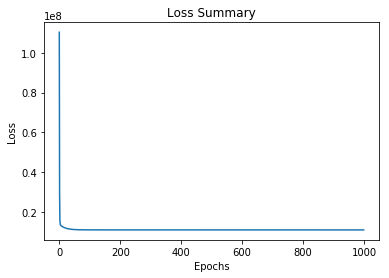

In [29]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_history)
plt.title("Loss Summary")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [30]:
mse = loss_history[-1]

In [31]:
print(w_final)
print(b_final)
print(mse)

[[0.6226004 ]
 [3.0774918 ]
 [0.21202205]]
[0.18505369]
11130982.0


## 以 Kaggle House Prices 建立一個複迴歸模型：SalePrice ~ OverallQual + GrLivArea

In [32]:
!kaggle competitions download -c house-prices-advanced-regression-techniques --force

  0%|                                               | 0.00/31.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 31.2k/31.2k [00:00<00:00, 1.45MB/s]
100%|████████████████████████████████████████| 441k/441k [00:00<00:00, 1.14MB/s]

100%|████████████████████████████████████████| 450k/450k [00:00<00:00, 1.50MB/s]

  0%|                                               | 0.00/13.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.1k/13.1k [00:00<00:00, 5.46MB/s]


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

train = pd.read_csv("train.csv")
X_arr = train.loc[:, ["OverallQual", "GrLivArea"]].values
y_arr = train["SalePrice"].values.reshape(-1, 1)
scalerX = StandardScaler().fit(X_arr)
scalery = StandardScaler().fit(y_arr)
X_arr_scaled = scalerX.transform(X_arr)
y_arr_scaled = scalery.transform(y_arr)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_arr_scaled, y_arr_scaled, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 2)
(438, 2)
(1022, 1)
(438, 1)


In [35]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
alpha = 0.00001
file_writer_path = "./graphs/linear-regression"

# placeholders
with tf.name_scope("placeholders"):
    X = tf.placeholder(tf.float32) # 不指定外觀
    y = tf.placeholder(tf.float32) # 不指定外觀
# variables
with tf.name_scope("variables"):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
# prediction
with tf.name_scope("prediction"):
    y_pred = tf.add(tf.matmul(X, W), b)
# loss
with tf.name_scope("loss"):
    loss = tf.reduce_sum(tf.pow(tf.subtract(y, y_pred), 2))
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

In [36]:
epochs = 1000
file_writer_path = "./graphs/linear-regression"
loss_history = []
n_obs = X_train.shape[0]
batch_size = 50

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(epochs):
        pos = 0
        while pos < n_obs:
            batch_X = X_train[pos:(pos + batch_size)]
            batch_y = y_train[pos:(pos + batch_size)]
            feed_dict = {
                X: batch_X,
                y: batch_y
            }
            _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
            pos += batch_size
        loss_history.append(loss_)
        if i % 100 == 0:
            print("epoch {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

epoch 0, loss: 76.32481384277344
epoch 100, loss: 5.032845497131348
epoch 200, loss: 2.500154495239258
epoch 300, loss: 1.9693489074707031
epoch 400, loss: 1.8021502494812012
epoch 500, loss: 1.741830825805664
epoch 600, loss: 1.7185707092285156
epoch 700, loss: 1.7093147039413452
epoch 800, loss: 1.705579400062561
epoch 900, loss: 1.7040627002716064


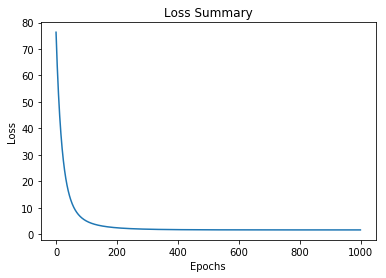

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_history)
plt.title("Loss Summary")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y_pred_before_inverse = X_test.dot(w_final) + b_final[0]
y_pred = scalery.inverse_transform(y_pred_before_inverse)
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state=123)
mse = mean_squared_error(y_test, y_pred)
print(mse)

1532445963.4320564
